In [ ]:
import gradio as gr

In [24]:
import numpy as np

In [223]:
from sklearn.cluster import AgglomerativeClustering

In [2]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

In [169]:
%matplotlib inline

import umap.umap_ as umap

from matplotlib import pyplot as plt 

In [10]:
bool(embeddings) == False

True

In [46]:
max(embeddings, key=embeddings.get)

ValueError: max() arg is an empty sequence

In [48]:
embeddings.keys()

dict_keys([])

In [25]:
def plot_embedding(embedding):

    assert len(embedding)==384
    data = np.split(embedding, 16)
    
    fig, ax = plt.subplots()
    ax.imshow(data)#, cmap=cmap, norm=norm)
    cmap = plt.get_cmap('turbo')
    plt.set_cmap(cmap)
    plt.axis('off')
#     plt.show()
    return ax

In [326]:
def embed_to_storage(text):
    embedding = model.encode(text)
    global embeddings
#     if globals()[embeddings] == False:
    globals()['embeddings'].append((text, embedding))
#     else:

    embedding = np.split(embedding, 16)
    return np.stack(embedding, axis=0 )

In [331]:
def make_plot(embeddings):
    if len(embeddings)>=5:
        just_embs = [x[1] for x in embeddings]
        just_embs = just_embs /  np.linalg.norm(just_embs, axis=1, keepdims=True)

        clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5, affinity='euclidean') #, affinity='cosine', linkage='average', distance_threshold=0.4)
        clustering_model.fit(just_embs)
        cluster_assignment = clustering_model.labels_

        reducer = umap.UMAP(int(np.ceil(np.sqrt(len(just_embs)))), metric="euclidean")
        projections = reducer.fit_transform(just_embs)

        x = list(projections[:,0])
        y = list(projections[:,1])

        plt.scatter(x,y, c=cluster_assignment, cmap='viridis')#, s=cluster_assignment)
        plt.axis('off')
    else:
        print(f"You currently have {len(embeddings)} embeddings, add more text until you hit 5 to viz!")
# plt.legend()

In [322]:
embeddings = list()

In [329]:
len(embeddings)

3

In [327]:

ui = gr.Interface(
    fn=embed_to_storage,
    inputs=gr.Textbox(lines=2, placeholder="Name Here..."),
    outputs=gr.outputs.Image(type="numpy"),
)
ui.launch()


C:\Users\Danny\.conda\envs\nlp_swifter\lib\site-packages\gradio\outputs.py:43: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7874

To create a public link, set `share=True` in `launch()`.


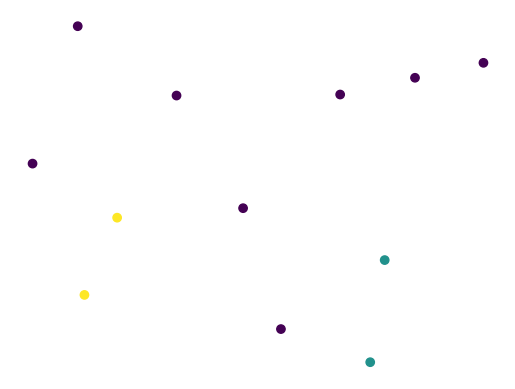

In [333]:
make_plot(embeddings)

In [296]:
cluster_assignment

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0], dtype=int64)

array([0, 1, 2], dtype=int64)

In [308]:
reducer = umap.UMAP(int(np.ceil(np.sqrt(len(just_embs)))), metric="euclidean")
projections = reducer.fit_transform(just_embs)

x = list(projections[:,0])
y = list(projections[:,1])




for zz in np.unique(cluster_assignment):
    print(list(compress([x[0] for x in embeddings], cluster_assignment==zz)))
#     plt.scatter(x,y, c=cluster_assignment, cmap='viridis')
    
    
    
    
# plt.legend()

['elephant', 'horse', 'whore', 'concubine', 'alligator', 'Skunk', 'Cornbread', 'Gull eggs, gathered in spring from the nests of wild gulls, are a source or form of eggs as food. ']
['poop', 'Poop', 'Poop sock']
['Horseshoes are common good luck charms', "Thanks for those suggestions, but they don't work for me. ", 'Science Fiction Adventures was a US science fiction magazine, published from 1956 to 1958 by Royal Publications as a companion to Infinity Science Fiction and edited by Larry Shaw for all 12 issues.']


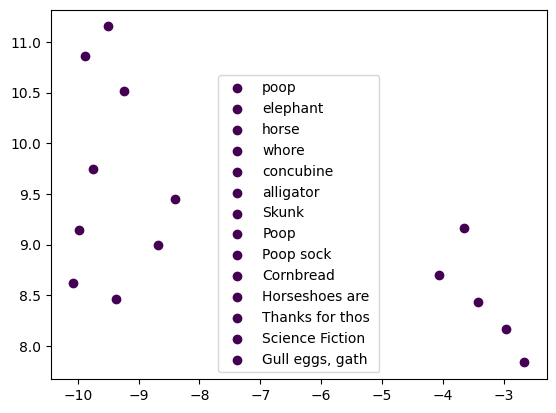

In [298]:
reducer = umap.UMAP(int(np.ceil(np.sqrt(len(just_embs)))), metric="euclidean")
projections = reducer.fit_transform(just_embs)

for i in range(0, len(embeddings)):
    plt.scatter(x[i], y[i], label=embeddings[i][0][:15], c=cluster_assignment[i], cmap='viridis')

# plt.scatter(x,y, c=cluster_assignment, cmap='viridis')
plt.legend()

In [277]:
[x[0] for x in embeddings]

['poop',
 'elephant',
 'horse',
 'whore',
 'concubine',
 'alligator',
 'Skunk',
 'Poop',
 'Poop sock',
 'Cornbread',
 'Horseshoes are common good luck charms',
 "Thanks for those suggestions, but they don't work for me. ",
 'Science Fiction Adventures was a US science fiction magazine, published from 1956 to 1958 by Royal Publications as a companion to Infinity Science Fiction and edited by Larry Shaw for all 12 issues.',
 'Gull eggs, gathered in spring from the nests of wild gulls, are a source or form of eggs as food. ']

In [278]:
[x[0] for x in embeddings][::cluster_assignment==1]

TypeError: only integer scalar arrays can be converted to a scalar index

In [279]:
from itertools import compress

In [286]:
list(compress([x[0] for x in embeddings], cluster_assignment==0))

['elephant',
 'horse',
 'whore',
 'concubine',
 'alligator',
 'Skunk',
 'Cornbread',
 'Gull eggs, gathered in spring from the nests of wild gulls, are a source or form of eggs as food. ']

In [236]:
cluster_assignment

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0], dtype=int64)

In [237]:
len(embeddings)

14

In [ ]:
# https://stackoverflow.com/questions/7908636/how-to-add-hovering-annotations-to-a-plot

In [ ]:
annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

C:\Users\Danny\AppData\Local\Temp\ipykernel_17216\2216437561.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


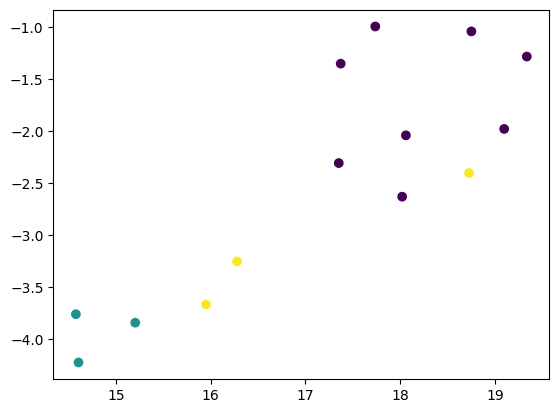

In [254]:

def update_annot(ind):
    
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)
    

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig,ax = plt.subplots()
fig.canvas.mpl_connect("motion_notify_event", hover)

# plt.figure()
ax 
fig.show() 

In [211]:
projections2 = reducer.fit([x[1] for x in embeddings])

In [212]:
projections2

UMAP(n_neighbors=4, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [213]:
umap.plot.points(projections2)

AttributeError: module 'umap.umap_' has no attribute 'plot'